# Metodos de ensamble

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode, time
import numpy as np
import warnings
from tqdm import tqdm


In [2]:
start_i = time.time()
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.5f}'.format

## Load data


### raw data
- costo de atencion hospitalaria por accidentes: https://www.datos.gov.co/Salud-y-Protecci-n-Social/Costos-de-la-atenci-n-hospitalaria-en-Bucaramanga-/g4vd-w4ip

In [3]:
f = "https://www.datos.gov.co/api/views/g4vd-w4ip/rows.csv"
raw = pd.read_csv(f, sep=',', dtype=str, na_values=['-','#¡NUM!','ERROR: #N/A','#N/A','#N/D','SIN INFORMACION','SN','S/N'])
raw.columns = [unidecode.unidecode(c.lower().strip()).replace('  ',' ').strip().replace(' ','_') for c in raw]
raw = raw.set_index('numero')

### data procesada en clase 7

In [4]:
data = dict()
for f in ['data','data0','data1']:
    try:
        fName = fr"C:\Users\dherrera\OneDrive - Universidad Tecnológica de Bolívar\Asignaturas\07. METODOS ESTADISTICOS AVANZADOS\Clase 7 - Regressions\tarea\data\{f}.pickle"
        data[f] = pd.read_pickle(fName, compression='gzip')
    except:
        fName = fr"E:\dherrera\OneDrive - Universidad Tecnológica de Bolívar\Asignaturas\07. METODOS ESTADISTICOS AVANZADOS\Clase 7 - Regressions\tarea\data\{f}.pickle"
        data[f] = pd.read_pickle(fName, compression='gzip')

## utilizamos los datos que se usaron pero sin normalizar
data = data['data0']
data.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,"23,305.00000",32.60970,12.91249,1.00000,23.00000,29.00000,39.00000,118.00000
sexo,"23,305.00000",0.33508,0.47203,0.00000,0.00000,0.00000,1.00000,1.00000
requerimiento_de_cx,"23,305.00000",0.02888,0.16747,0.00000,0.00000,0.00000,0.00000,1.00000
referido_a_otra_ips,"23,305.00000",0.00120,0.03464,0.00000,0.00000,0.00000,0.00000,1.00000
politraumatismo,"23,305.00000",0.10551,0.30722,0.00000,0.00000,0.00000,0.00000,1.00000
condicion_egreso,"23,305.00000",0.00069,0.02619,0.00000,0.00000,0.00000,0.00000,1.00000
mes,"23,305.00000",6.26625,3.29860,1.00000,3.00000,6.00000,9.00000,12.00000
ano,"23,305.00000","2,019.50191",1.10979,"2,016.00000","2,019.00000","2,019.00000","2,021.00000","2,021.00000"
dia_semana,"23,305.00000",4.01751,2.02616,1.00000,2.00000,4.00000,6.00000,7.00000
tipo_de_vehiculo__bicicleta,"23,305.00000",0.00451,0.06697,0.00000,0.00000,0.00000,0.00000,1.00000


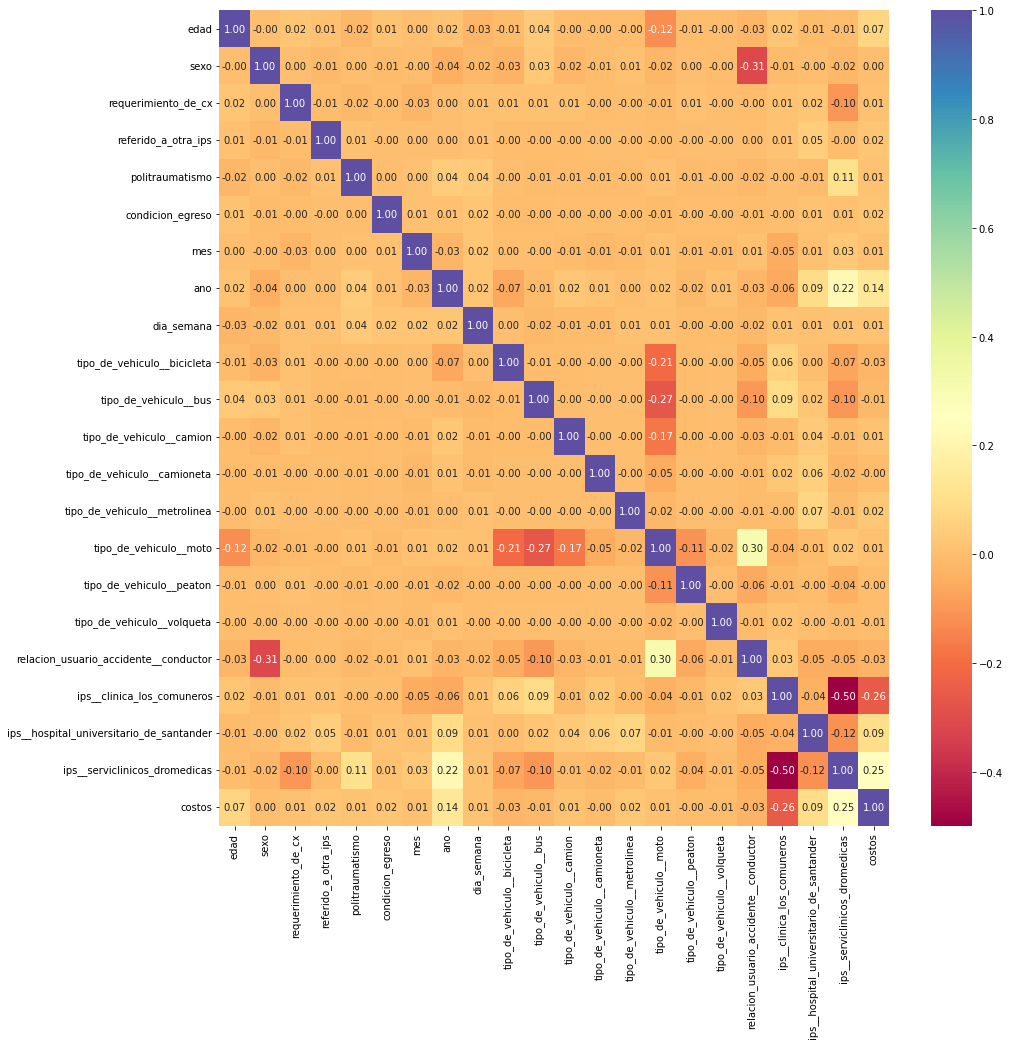

In [5]:
# Correlation matrix between numerical values
plt.figure(figsize=(15,15))
g = sns.heatmap(data.corr(),annot=True, fmt = ".2f", cmap = "Spectral")
plt.show()

# Modelar

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
## normalizar
data = pd.DataFrame(
                MinMaxScaler().fit_transform(data)          # feature_range=(-1,1)
                , columns=data.columns
                , index=data.index
            )

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
target = "costos"
X = data.drop(target,axis=1)
y = data[target]
print("X.shape=",X.shape, ", y.shape=",y.shape)

X.shape= (23305, 21) , y.shape= (23305,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1432)

### Validación cruzada de modelos

Vamos a comparar varios clasificadores populares y evaluar la precisión media de cada uno de ellos mediante un procedimiento de validación cruzada estratificada de kfold.

- Decision Tree
- AdaBoost
- Random Forest
- Extra Trees
- Gradient Boosting
- Multiple layer perceprton (neural network)
- KNN
- Linear Regression

In [11]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor, HistGradientBoostingRegressor 
from sklearn.ensemble import VotingClassifier, StackingClassifier, StackingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, cross_validate
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
import sklearn

In [12]:
# Cross validate model with Kfold stratified cross val
n_splits = 5
kfold = StratifiedKFold(n_splits=n_splits)

In [13]:
print(sorted(sklearn.metrics.SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 

```python
## Classifiers
random_state = None
classifiers = []
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(random_state=random_state,learning_rate=0.1))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(BaggingClassifier(random_state=random_state))
classifiers.append(HistGradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
```

In [14]:
list_regressors_models = ['RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','ExtraTreesRegressor','BaggingRegressor','HistGradientBoostingRegressor'
,'KNeighborsRegressor','DecisionTreeRegressor','MLPRegressor'
# ,'LogisticRegression'
]

In [15]:
random_state = 123
regressors_models = dict()
for m in list_regressors_models:
    if m=="AdaBoostRegressor":
        regressors_models[m] = {"regressor": eval(f"{m}(random_state={random_state}, learning_rate=0.1)")}
    elif m=="KNeighborsRegressor":
        regressors_models[m] = {"regressor": eval(f"{m}()")}
    else:
        regressors_models[m] = {"regressor": eval(f"{m}(random_state={random_state})")}
regressors_models

{'RandomForestRegressor': {'regressor': RandomForestRegressor(random_state=123)},
 'AdaBoostRegressor': {'regressor': AdaBoostRegressor(learning_rate=0.1, random_state=123)},
 'GradientBoostingRegressor': {'regressor': GradientBoostingRegressor(random_state=123)},
 'ExtraTreesRegressor': {'regressor': ExtraTreesRegressor(random_state=123)},
 'BaggingRegressor': {'regressor': BaggingRegressor(random_state=123)},
 'HistGradientBoostingRegressor': {'regressor': HistGradientBoostingRegressor(random_state=123)},
 'KNeighborsRegressor': {'regressor': KNeighborsRegressor()},
 'DecisionTreeRegressor': {'regressor': DecisionTreeRegressor(random_state=123)},
 'MLPRegressor': {'regressor': MLPRegressor(random_state=123)}}

In [16]:
## cross validation and run model
## usamos rmse como metrica
p_bar = tqdm(iterable=regressors_models.items(), total=len(regressors_models))
for k,v in p_bar:
    p_bar.set_description(f"Model = {k}")
    model = v['regressor']
    cv_score = cross_val_score(estimator=model, X=X_train, y=y_train, scoring="neg_mean_squared_error", cv=n_splits, n_jobs=4)
    regressors_models[k].update({"cross_val_score": cv_score}) # ,scoring="accuracy"
    regressors_models[k].update({"cv_mean": cv_score.mean(), "cv_std": cv_score.std()})
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    regressors_models[k].update({"model": model})
    regressors_models[k].update({"y_pred": y_pred, "rmse": np.sqrt(mean_squared_error(y_pred,y_test))}) ## accuracy es solo para clasificacion
    # print("\t", k)

Model = MLPRegressor: 100%|██████████| 9/9 [00:33<00:00,  3.70s/it]                 


In [17]:
cv_res = pd.DataFrame(
        [(k, v['cv_mean'], v['cv_std'], v['rmse']) for k,v in regressors_models.items()]
        , columns = ['Algorithm','CrossValMeans','CrossValStd','RMSE']
)
cv_res=cv_res.sort_values(by="CrossValMeans",ascending=False).reset_index(drop=True)
cv_res

,Algorithm,CrossValMeans,CrossValStd,RMSE
0,HistGradientBoostingRegressor,-0.03299,0.00112,0.18127
1,GradientBoostingRegressor,-0.03304,0.00113,0.18159
2,MLPRegressor,-0.03366,0.00118,0.18286
3,AdaBoostRegressor,-0.03568,0.00071,0.18917
4,RandomForestRegressor,-0.03852,0.00062,0.19389
5,KNeighborsRegressor,-0.03875,0.00114,0.19508
6,BaggingRegressor,-0.04141,0.00031,0.20098
7,ExtraTreesRegressor,-0.04429,0.00042,0.20932
8,DecisionTreeRegressor,-0.06572,0.00199,0.24969


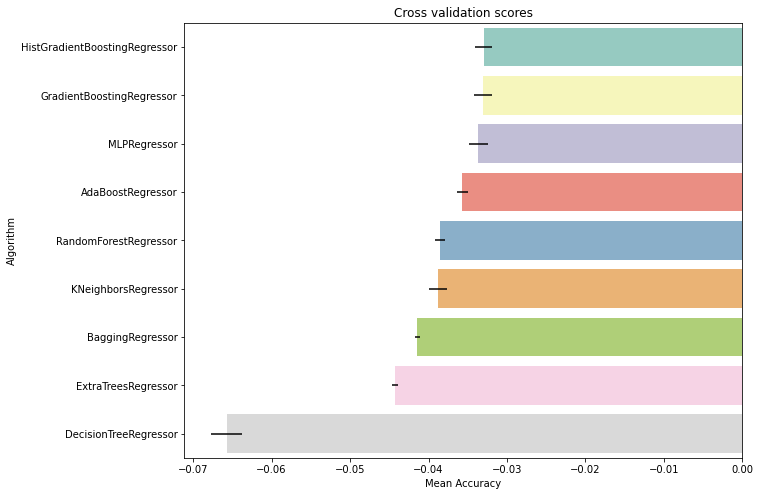

In [18]:
plt.figure(figsize=(10,8))
g = sns.barplot("CrossValMeans","Algorithm",data=cv_res,palette="Set3",orient="h",**{'xerr':cv_res['CrossValStd']})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

#### Interpretacion:
Se ecoge el que tiene mejor valor CV, para el caso anterior **CrossValMeans**, en el caso de la metrica usada para el **CV** --> `neg_mean_squared_error` seria el mas positivo.

In [19]:
# Siendo los modelos escogidos:
best_models = ['HistGradientBoostingRegressor', 'GradientBoostingRegressor', 'MLPRegressor', 'AdaBoostRegressor']
best_models = dict((k,regressors_models[k]) for k in best_models)
best_models.keys()

dict_keys(['HistGradientBoostingRegressor', 'GradientBoostingRegressor', 'MLPRegressor', 'AdaBoostRegressor'])

In [20]:
print("\n".join([f"RMSE for {k} = {v['rmse']}" for k,v in best_models.items()]))

RMSE for HistGradientBoostingRegressor = 0.18127203354677238
RMSE for GradientBoostingRegressor = 0.1815906085703092
RMSE for MLPRegressor = 0.18285755103389706
RMSE for AdaBoostRegressor = 0.1891654953245159


In [21]:
#voting : {'hard', 'soft'}
votingC = VotingRegressor(estimators=[(k, v['model']) for k,v in best_models.items()], n_jobs=4)
votingC = votingC.fit(X_train, y_train)
predicted_All_Voting = votingC.predict(X_test)
rmse_VotingC = np.sqrt(mean_squared_error(predicted_All_Voting,y_test))

regressors_models['VotingEnsamble'] = {"model":votingC, "y_pred":predicted_All_Voting, "rmse": rmse_VotingC}

print(f"RMSE with Voting = {rmse_VotingC}")

RMSE with Voting = 0.18172288117086258


In [22]:
#stack_method : {'auto', 'predict_proba', 'decision_function', 'predict'}
stackingC = StackingRegressor(estimators=[(k, v['model']) for k,v in best_models.items()], n_jobs=4)
stackingC = stackingC.fit(X_train, y_train)
predicted_All_Voting = stackingC.predict(X_test)
rmse_stackingC = np.sqrt(mean_squared_error(predicted_All_Voting,y_test))

regressors_models['StackingEnsamble'] = {"model":stackingC, "y_pred":predicted_All_Voting, "rmse": rmse_stackingC}

print(f"RMSE with Stacking = {rmse_stackingC}")

RMSE with Stacking = 0.18080050676882264


In [23]:
res = pd.DataFrame(
        [(k, v['rmse']) for k,v in regressors_models.items()]
        , columns = ['Algorithm','RMSE']
).sort_values("RMSE").reset_index(drop=True)
res

,Algorithm,RMSE
0,StackingEnsamble,0.18080
1,HistGradientBoostingRegressor,0.18127
2,GradientBoostingRegressor,0.18159
3,VotingEnsamble,0.18172
4,MLPRegressor,0.18286
5,AdaBoostRegressor,0.18917
6,RandomForestRegressor,0.19389
7,KNeighborsRegressor,0.19508
8,BaggingRegressor,0.20098
9,ExtraTreesRegressor,0.20932


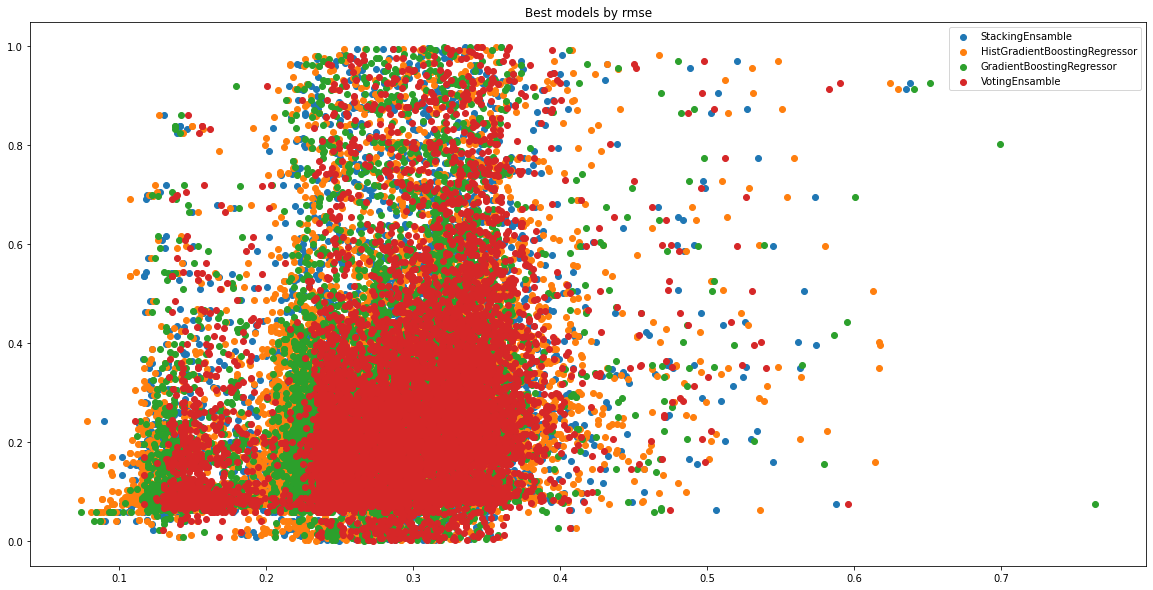

In [24]:
plt.figure(figsize=(20,10))

for k,y_pred in dict((k,regressors_models[k]['y_pred']) for k in list(res["Algorithm"][:4])).items():
    plt.scatter(y_pred, y_test, label=k)
    plt.legend()
plt.title("Best models by rmse")
plt.show()

In [25]:
print(time.time()-start_i)

48.84599018096924
